In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle as pickle
%matplotlib inline

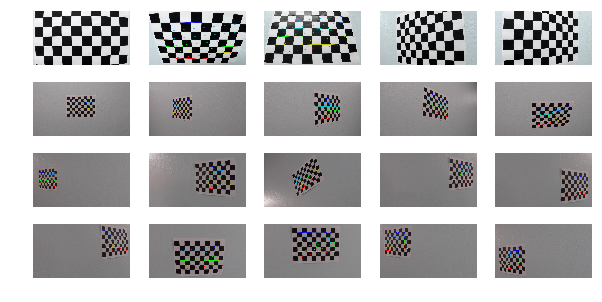

In [2]:
nx=9
ny=6
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
# Make a list of calibration images
plt.figure(figsize = (10,5))
mtx_all = []
dist_all = []
for i in range(20):
    fname = 'camera_cal/calibration'+ str(i+1) + '.jpg'
    img = cv2.imread(fname)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    #print(str(i+1) + ':' + str(ret))
    plt.subplot(4,5,i+1)
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp, corners, gray.shape[::-1],None,None)
        objpoints.append(objp)
        imgpoints.append(corners)        
        plt.imshow(img)
    else:
        plt.imshow(img)
    plt.axis('off')

In [3]:
cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp, corners, gray.shape[::-1],None,None)
objpoints.append(objp)
imgpoints.append(corners)
plt.imshow(img)

In [4]:
fname = 'camera_cal/calibration'+ str(1) + '.jpg'
img = cv2.imread(fname)
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
data = [mtx,dist]
pickle.dump( data, open( "camera_calibration.pkl", "wb" ) )

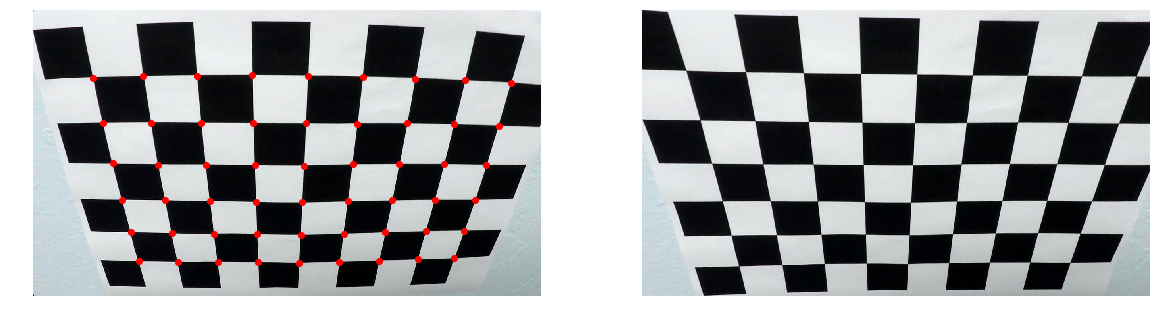

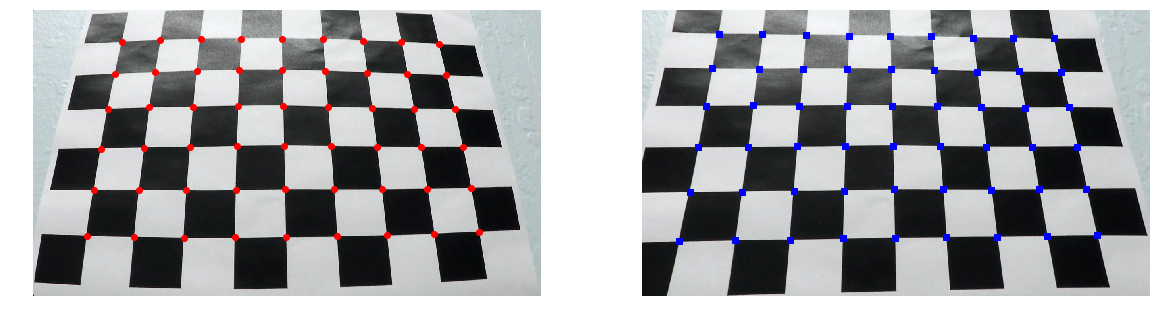

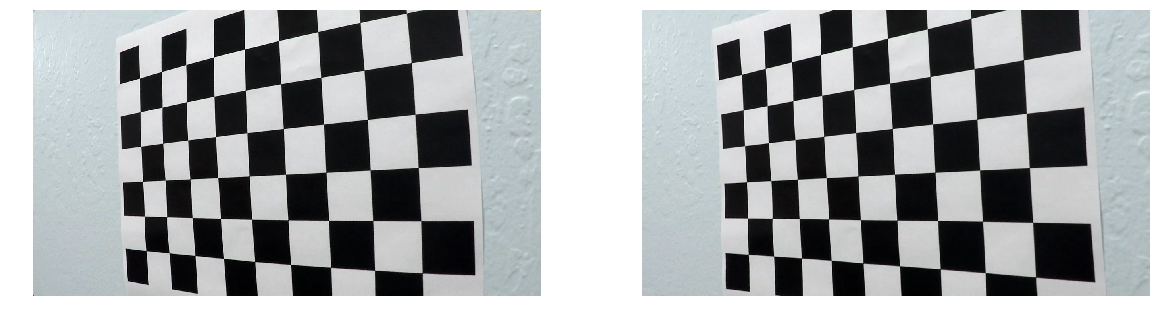

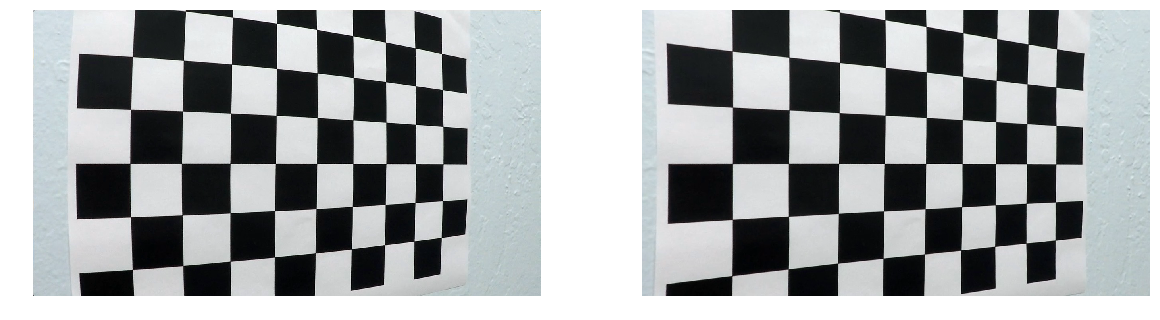

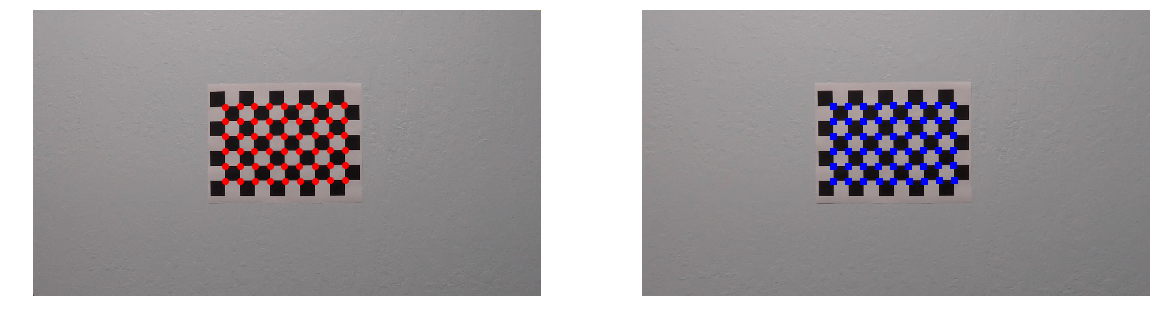

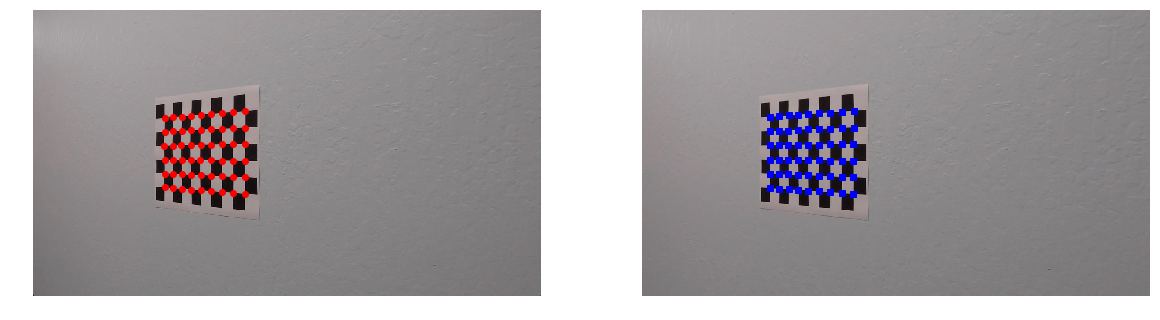

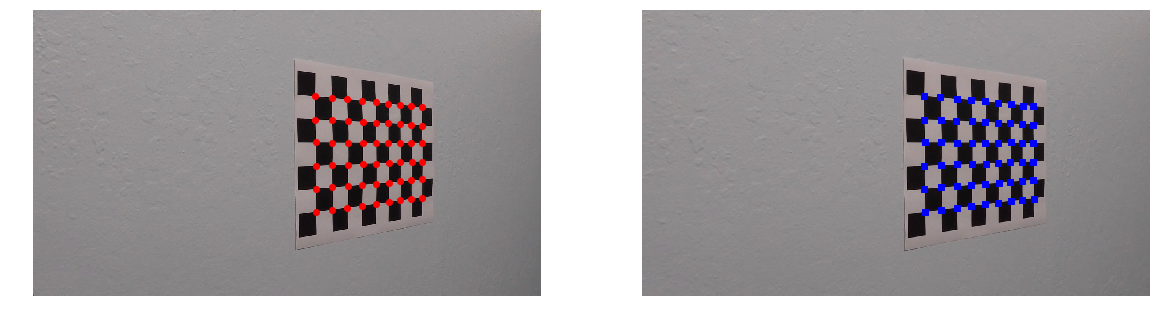

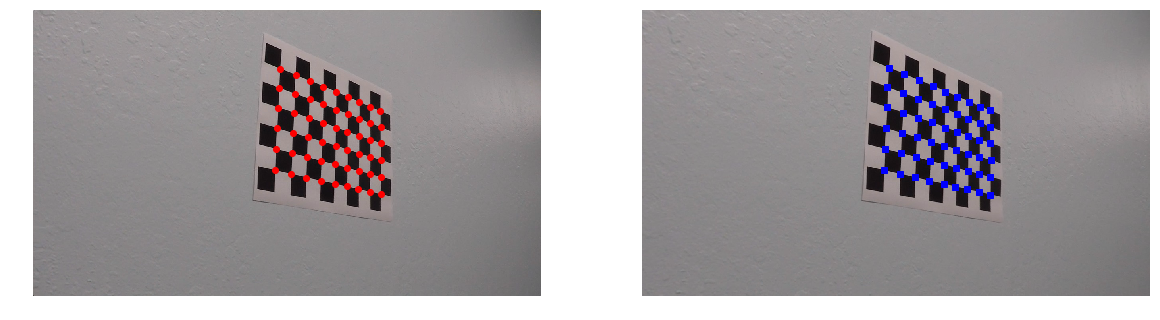

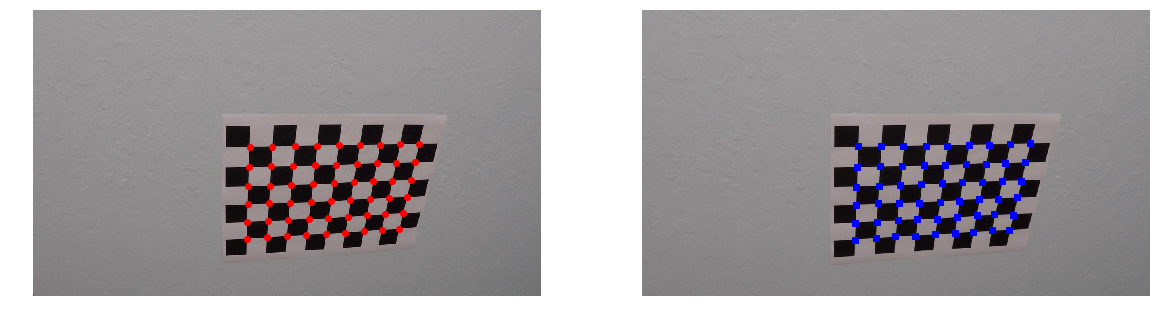

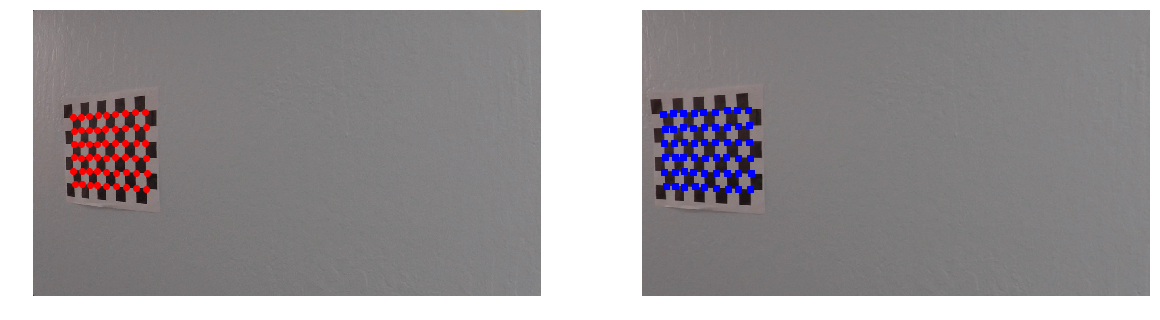

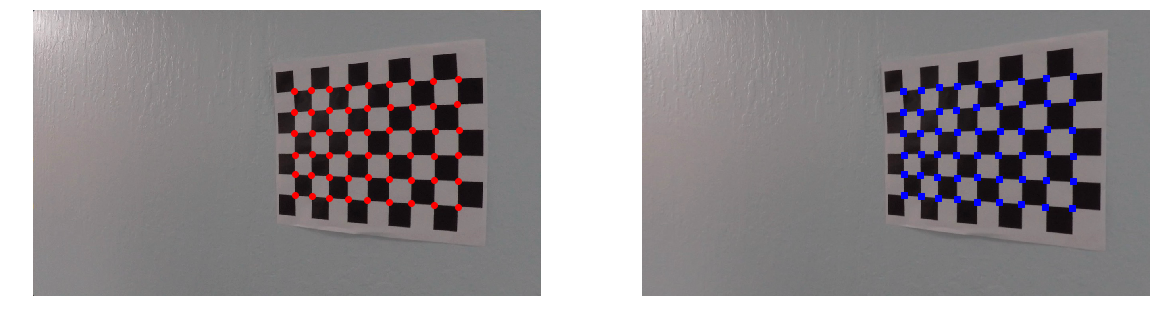

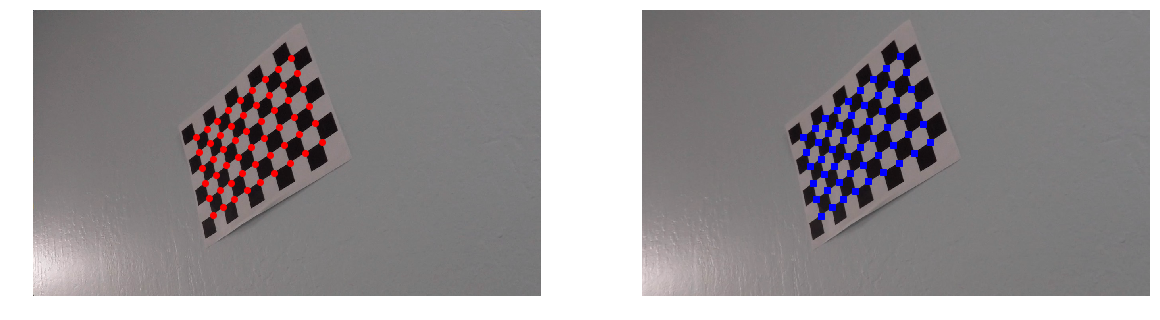

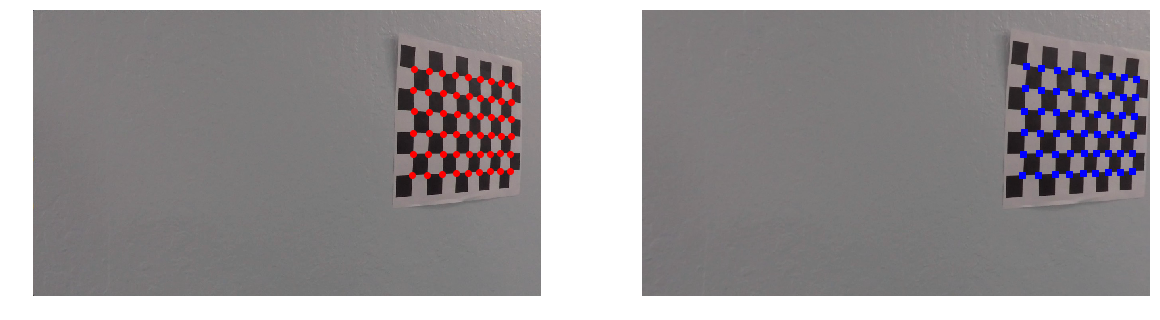

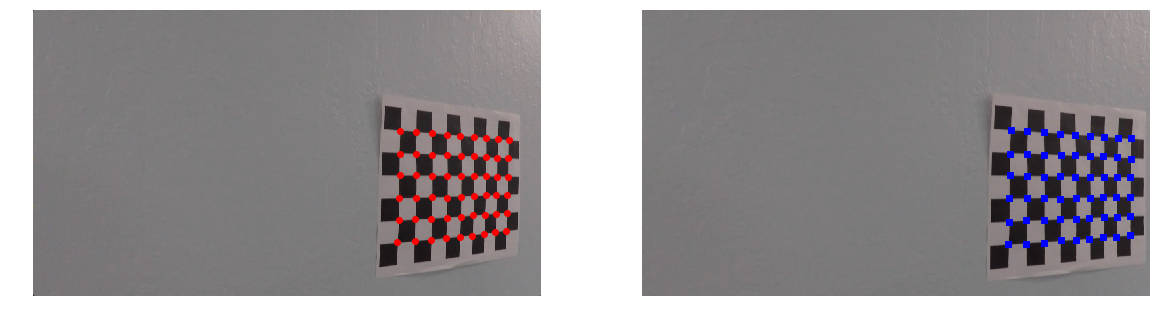

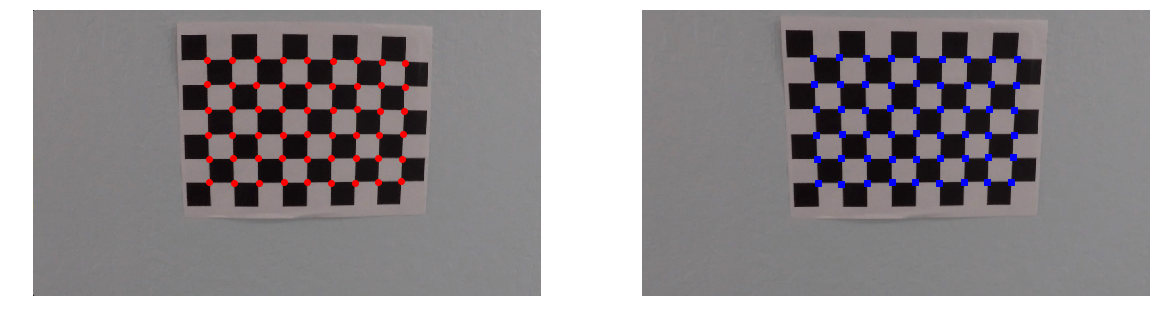

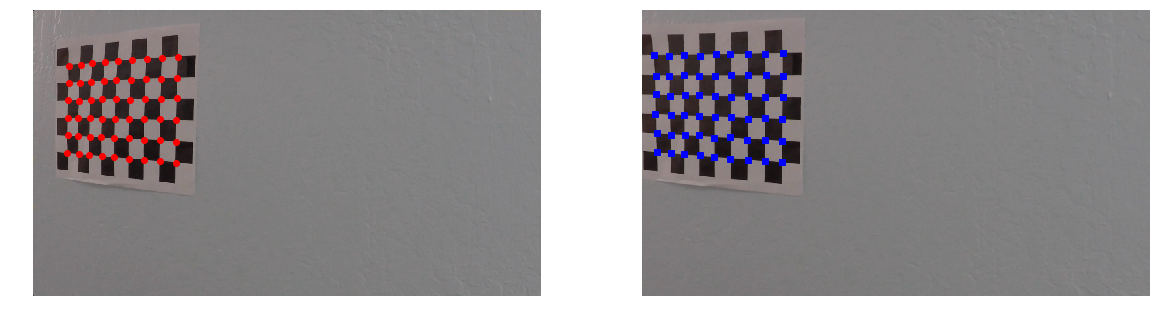

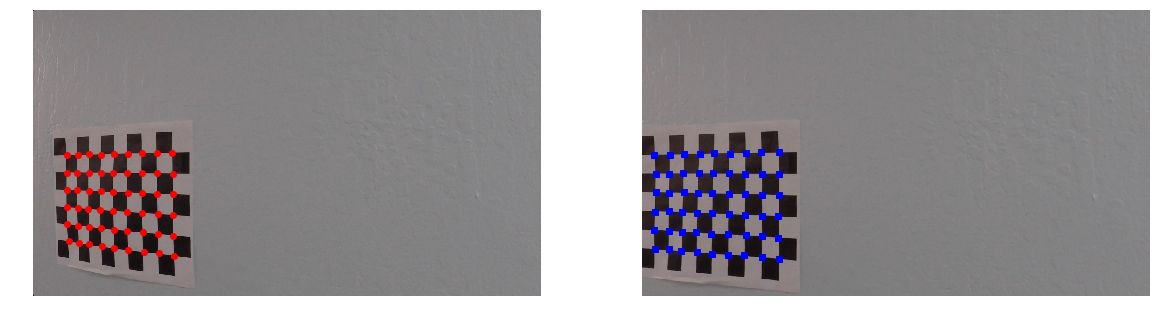

In [6]:
for i in range(20):
    fname = 'camera_cal/calibration'+ str(i+1) + '.jpg'
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    plt.figure(figsize=(20,8))
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    plt.subplot(1,2,1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    ret_ud, corners_ud = cv2.findChessboardCorners(undist, (nx, ny), None) 
    if ret == True:
        for i_c in range(len(corners)):
            plt.plot(corners[i_c][0][0],corners[i_c][0][1],'ro')
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(undist)
    if ret_ud == True:
        for i_c in range(len(corners_ud)):
            plt.plot(corners_ud[i_c][0][0],corners_ud[i_c][0][1],'bs')
    plt.axis('off');
    plt.show();
